# Data Project
<li><font size="4">Class:DAV 5300 Computational Mathematics and Statistics</font>
<li><font size="4">Director:Jason Bryer </font>
<li><font size="4">Author:Zhengnan Li, Qing Dou, Yu Wang</font>

# 1. Abstract

We aim to investigate the relationships between various performance characteristics of semiconductor chips to determine if there are significant correlations among the attributes and score. Specifically, this study seeks to understand if certain physical attributes can predict performance metrics, thereby offering insights into the design and optimization of semiconductor chips. The primary objectives include identifying key performance indicators (KPIs) that are closely related, quantifying the strength of these relationships, and evaluating the feasibility of using certain metrics to predict others in the context of chip performance and design optimization.This study is observational. The data were collected without manipulating the variables, observing the characteristics of CPUs as they have been released by their vendors.

# 2. Overview

## 2.1 Data Collection

Data was compiled from dataset wbesite which is about hardware review. Click the link to see the dataset.
[Chip of CPU and GPU](https://www.heywhale.com/mw/dataset/64dc9b5000151985794c41a9/content)

### 2.1.1 Data Preparation

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
chips = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/DAV_5300/main/Data_Project/src/chip_dataset.csv')
chips['Release Date'] = pd.to_datetime(chips['Release Date'])
chips = chips.drop(columns=['Type'])
chips

,Product,Release Date,Process Size,TDP,Die Size,Transistors,Freq,Vendor
0,AMD Athlon 64 3500+,2007-02-20,65,45,77.0,122,2200,AMD
1,AMD Athlon 200GE,2018-09-06,14,35,192.0,4800,3200,AMD
2,Intel Xeon E5-2603 v2,2013-09-01,22,80,160.0,1400,1800,Intel
3,AMD Phenom II X4 980 BE,2011-05-03,45,125,258.0,758,3700,AMD
4,Intel Xeon E5-2470 v2,2013-09-01,22,95,160.0,1400,2400,Intel
...,...,...,...,...,...,...,...,...
3494,ATI FirePro V7800,2010-04-26,40,150,334.0,2154,700,ATI
3495,NVIDIA Tegra 3 GPU,2011-11-09,40,20,80.0,10,416,NVIDIA
3496,NVIDIA Playstation 3 GPU 28nm,2013-06-03,28,21,68.0,302,550,NVIDIA
3497,NVIDIA Quadro 3000M,2011-02-22,40,75,332.0,1950,450,NVIDIA


In [2]:
score = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/DAV_5300/main/Data_Project/src/score.csv')
score

,Product,Score
0,Intel Core i9-14900KF,3108
1,Intel Core i9-13900KS,3105
2,Intel Core i9-14900K,3101
3,Intel Core i9-14900F,3020
4,Intel Core i7-14700KF,2975
...,...,...
3231,Intel Pentium SU2700,138
3232,AMD Athlon 1640B,136
3233,AMD E-300,129
3234,AMD C-50,123


In [3]:
chips = pd.merge(chips, score, on='Product', how='inner')
chips

,Product,Release Date,Process Size,TDP,Die Size,Transistors,Freq,Vendor,Score
0,AMD Athlon 64 3500+,2007-02-20,65,45,77.0,122,2200,AMD,129
1,AMD Athlon 64 3500+,2007-02-20,65,45,77.0,122,2200,AMD,116
2,AMD Athlon 64 3500+,2001-01-01,90,67,115.0,105,2200,AMD,129
3,AMD Athlon 64 3500+,2001-01-01,90,67,115.0,105,2200,AMD,116
4,AMD Athlon 64 3500+,2005-05-31,90,67,156.0,154,2200,AMD,129
...,...,...,...,...,...,...,...,...,...
939,Intel Core i7-4600M,2013-09-01,22,37,118.0,1300,2900,Intel,1956
940,AMD Ryzen 9 4900H,2020-03-16,7,54,156.0,9800,3300,AMD,1546
941,AMD Ryzen 9 4900H,2020-03-16,7,54,156.0,9800,3300,AMD,6772
942,Intel Core 2 Duo E6550,2007-07-01,65,65,143.0,291,2333,Intel,260


The cases in our dataset are individual Chip performance. Each row represents a distinct chip performance, with the dataset containing 3499 cases in total.

In [4]:
chips.shape

(944, 9)

## 2.2 Variables

In order to better understand the meaning of the table. Here is the explaination of each column
| Variable       | Description                                                                                   |
|----------------|-----------------------------------------------------------------------------------------------|
| Product        | Description of the products.                                                                  |                                                       
| Release Date   | The date of the product publish.                                                              |
| Process Size   | The size of the features (the elements that make up the transistors) in nanometers (nm).      |
| TDP            | Thermal design power, the theoretical maximum amount of heat generated by a CPU or GPU.       |
| Die Size       | The physical dimensions of a bare die, representing the die size of a specific chip.          |
| Transistors    | Tiny electronic switches that can be turned on or off by applying a voltage to their terminals.|
| Freq           | The clock rate of a CPU, normally determined by the frequency of an oscillator crystal.        |
| Vendor         | The company that produces the chip.                                                            |
| Score          | The score of the product.                                                                      |


### 2.2.1 Dependent Variable

The depedent varibale is the "Score".

### 2.2.2 Independent Variables

The independent variables are as follows:

Quantitative: Process Size, TDP, Die Size, Transistors, Freq.

Qualitative: Product,Release Date, Vendor.

## 2.3  Research question 

Is there a correlation between different performance metrics of chips and its score?

# 3. summary statistics 

 ## 3.1 For quantitative variables

In [5]:
summary_stats = chips[['Process Size', 'TDP', 'Die Size', 'Transistors', 'Freq']].describe()
print(summary_stats)

       Process Size         TDP    Die Size   Transistors         Freq
count    944.000000  944.000000  932.000000    944.000000   944.000000
mean      29.970339   77.502119  176.667382   1941.396186  2844.959746
std       16.627768   48.830219   70.325398   2616.082117   631.421185
min        7.000000    9.000000   66.000000     49.000000  1000.000000
25%       22.000000   45.000000  118.000000    504.000000  2400.000000
50%       32.000000   65.000000  169.000000   1178.000000  2900.000000
75%       32.000000   95.000000  228.000000   1400.000000  3333.000000
max      130.000000  280.000000  435.000000  19200.000000  4700.000000


Process Size: The average process size is approximately 29.97 nanometers, with a standard deviation of 16.63 nanometers. The minimum value is 7 nanometers and the maximum value is 130 nanometers. There are 944 observations in the data set.

Thermal Design Power (TDP): The average thermal design power is approximately 77.50 watts, with a standard deviation of 48.83 watts. The minimum value is 9 watts and the maximum value is 280 watts. There are 944 observations in the data set.

Die Size: The average die size is approximately 176.67 square millimeters, with a standard deviation of 70.33 square millimeters. The minimum value is 66 square millimeters and the maximum value is 435 square millimeters. There are 932 observations in the dataset.

Number of transistors: The average number of transistors is approximately 1941.40, and the standard deviation is 2616.08. The minimum value is 49 and the maximum is 19200. There are 944 observations in the data set.

Frequency (Freq): The average frequency is approximately 2844.96 MHz, with a standard deviation of 631.42 MHz. The minimum value is 1000 MHz and the maximum value is 4700 MHz. There are 944 observations in the data set.

 ## 3.2 For qualitative variables 

In [6]:
def qualitative(df, column_name):
    
    unique_values = df[column_name].value_counts()
    return unique_values
unique_vendors = qualitative(chips, 'Vendor')
unique_release_date = qualitative(chips, 'Release Date')
print(unique_vendors)
print("--------------------------")

Vendor
Intel    562
AMD      382
Name: count, dtype: int64
--------------------------


# 4. Data Visualizations

For visualizations relevant to our research question, scatter plots can effectively show the relationship between the CPU's operating frequency (Freq) and each of the following: Process Size, TDP, Die Size, and the number of Transistors. Coloring these plots by the Vendor can provide insights into any differences between CPU manufacturers.

- Vendors  
Explore the distribution of vendors

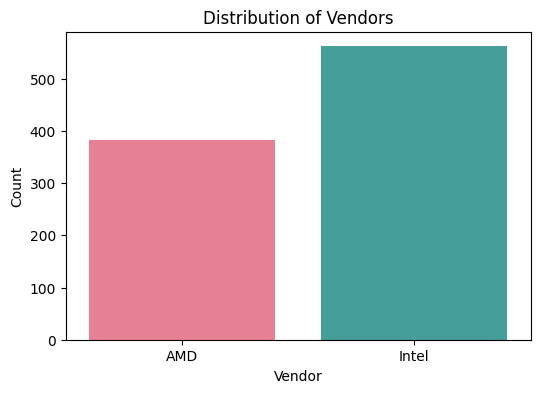

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(
x='Vendor', data=chips, palette='husl', hue='Vendor', legend=False
)
plt.title('Distribution of Vendors')
# Set labels and title
plt.xlabel('Vendor')
plt.ylabel('Count')
plt.show()

- Quantitative variables distribution and relationship between vendors and release date

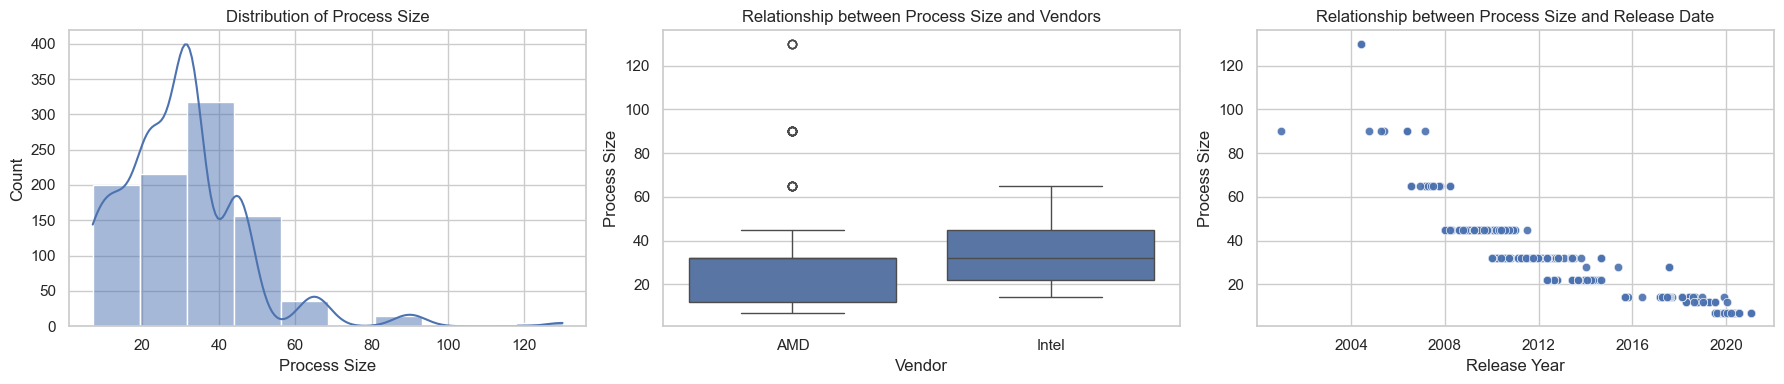

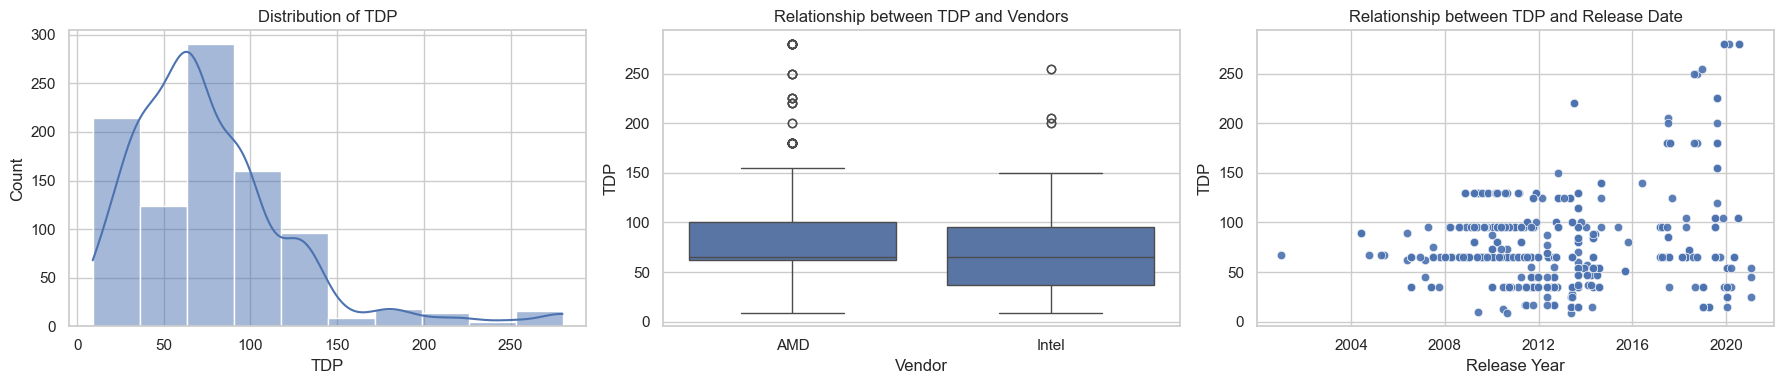

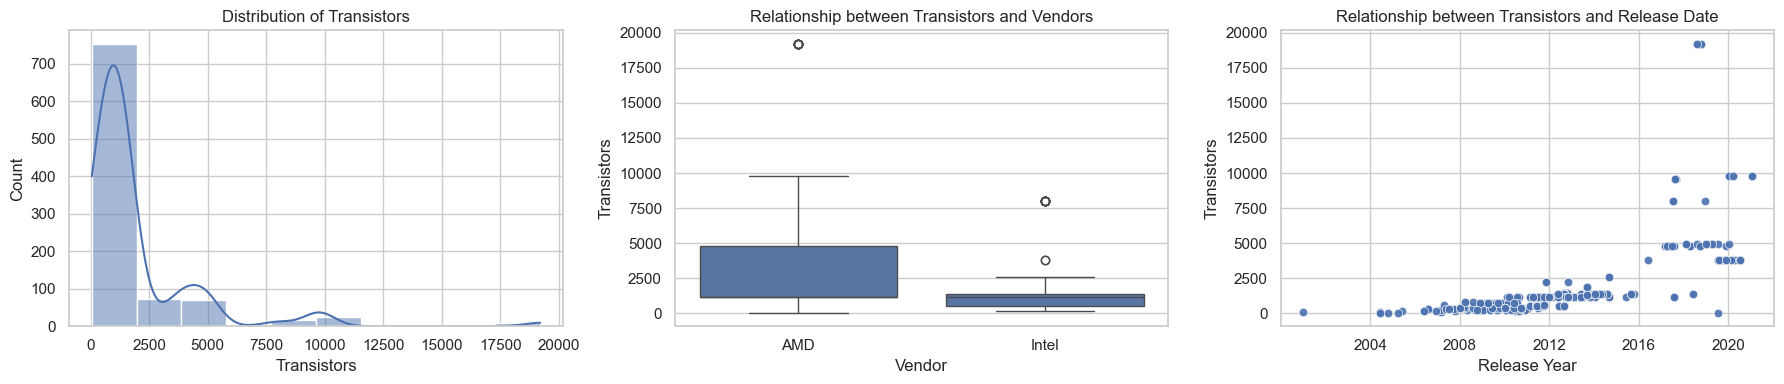

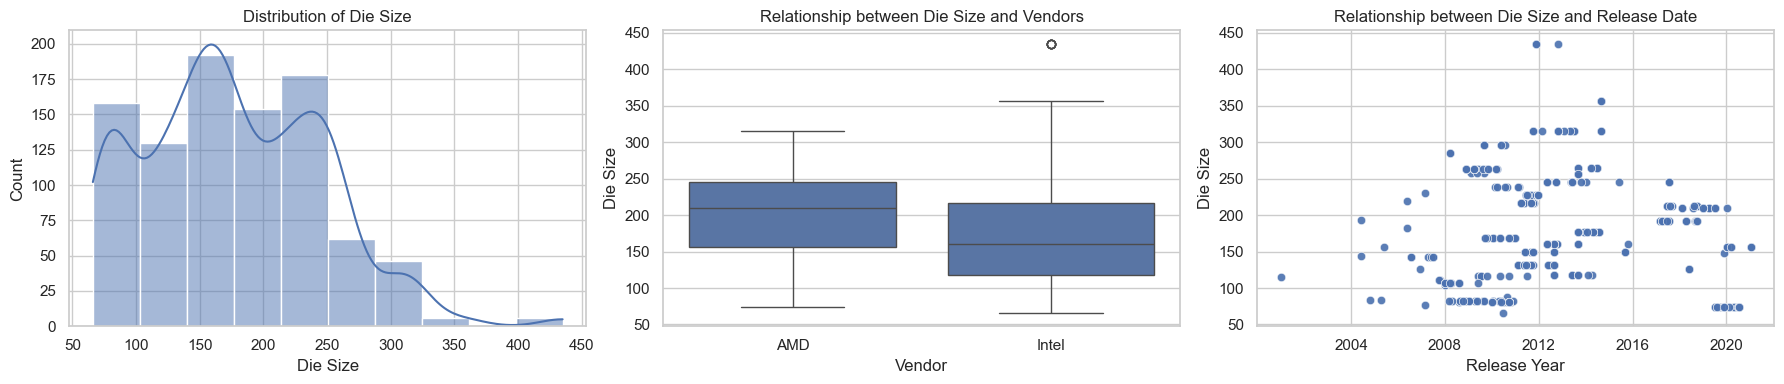

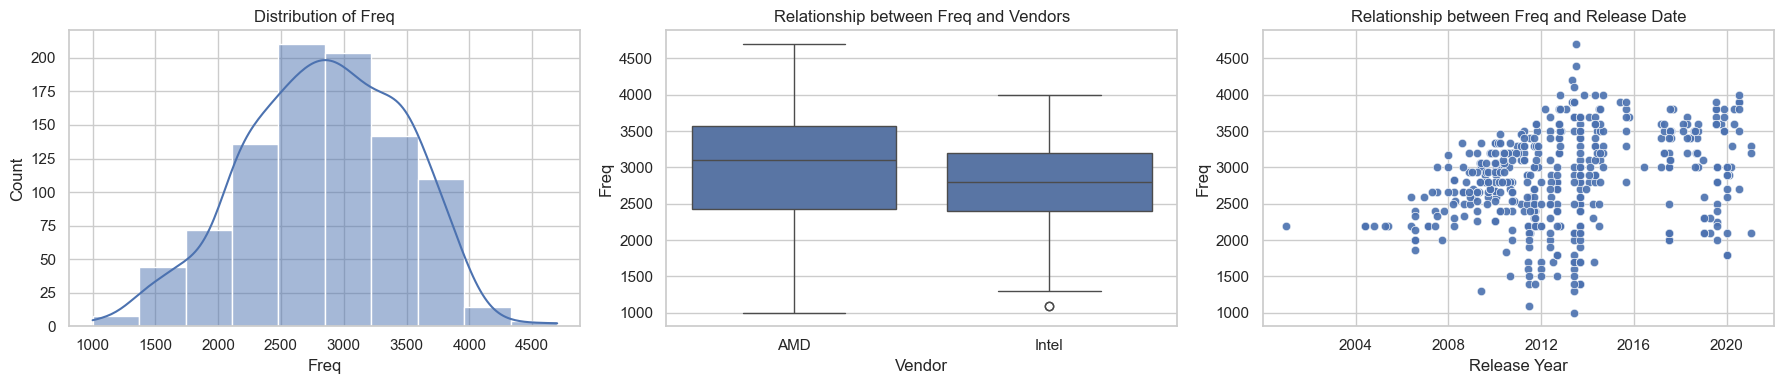

In [8]:
variables = ['Process Size', 'TDP', 'Transistors', 'Die Size', 'Freq']  
sns.set(style="whitegrid")

for var in variables:
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))  
    
    # set quantitative variables distribution
    sns.histplot(data=chips, x=var, kde=True, bins=10, ax=axs[0])
    axs[0].set_title(f'Distribution of {var}')
    axs[0].set_xlabel(var)
    axs[0].set_ylabel('Count')
    
    # set the relationship between quantitative variables and vendors
    sns.boxplot(x='Vendor', y=var, data=chips, ax=axs[1])
    axs[1].set_title(f'Relationship between {var} and Vendors')
    axs[1].set_xlabel('Vendor')
    axs[1].set_ylabel(var)
    
    # set the relationship between quantitative variables and release date
    sns.scatterplot(x='Release Date', y=var, data=chips,alpha=0.7, ax=axs[2])
    axs[2].set_title(f'Relationship between {var} and Release Date')
    axs[2].set_xlabel('Release Year')
    axs[2].set_ylabel(var)
    
    plt.tight_layout() 
    plt.show()

In [9]:
# apply log transformation except freq
for var in variables:
    if var != 'Freq':
        chips[f'log_{var}'] = np.log(chips[var] + 1)
    else:
        chips[f'log_{var}'] = chips[var]

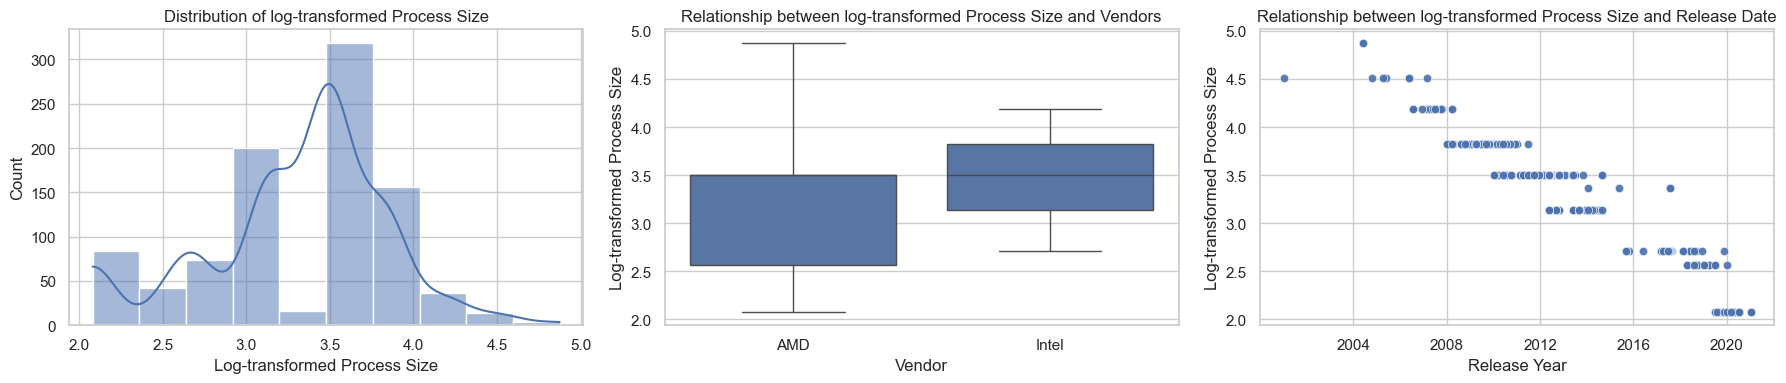

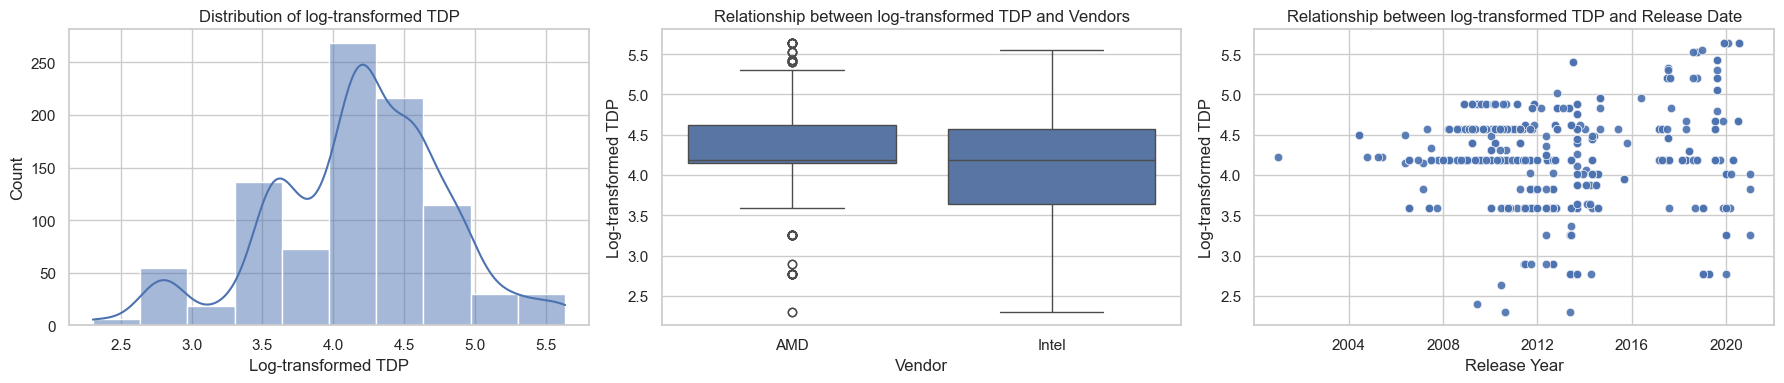

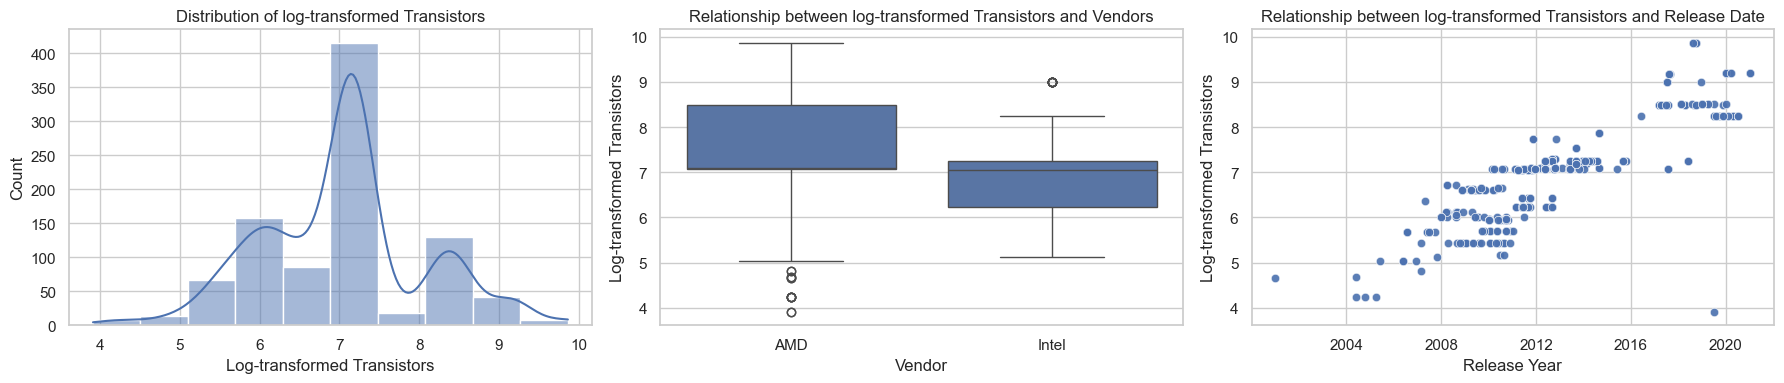

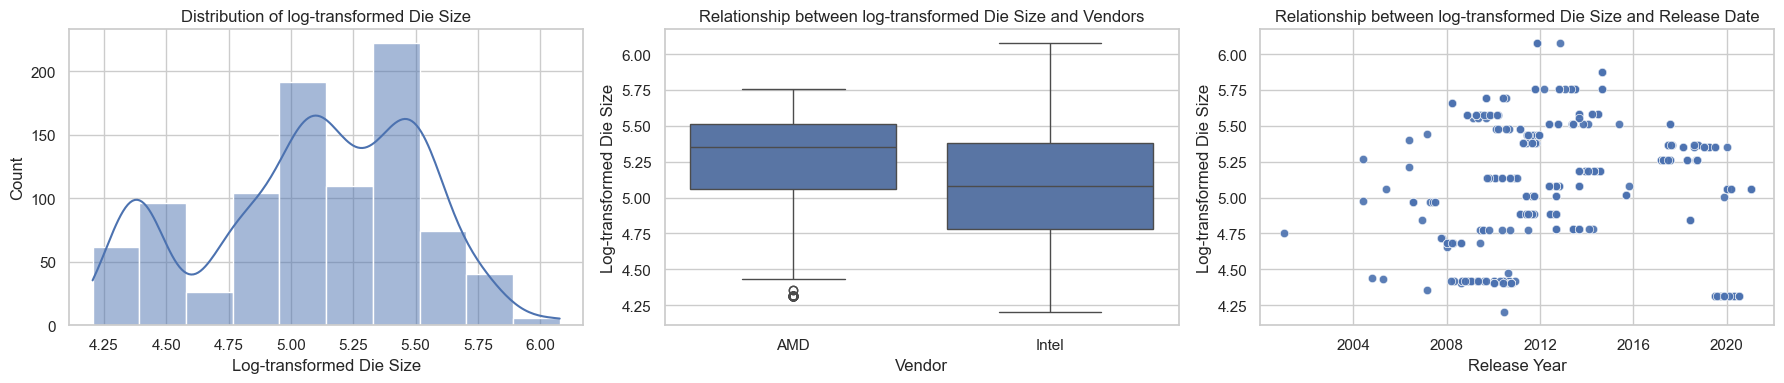

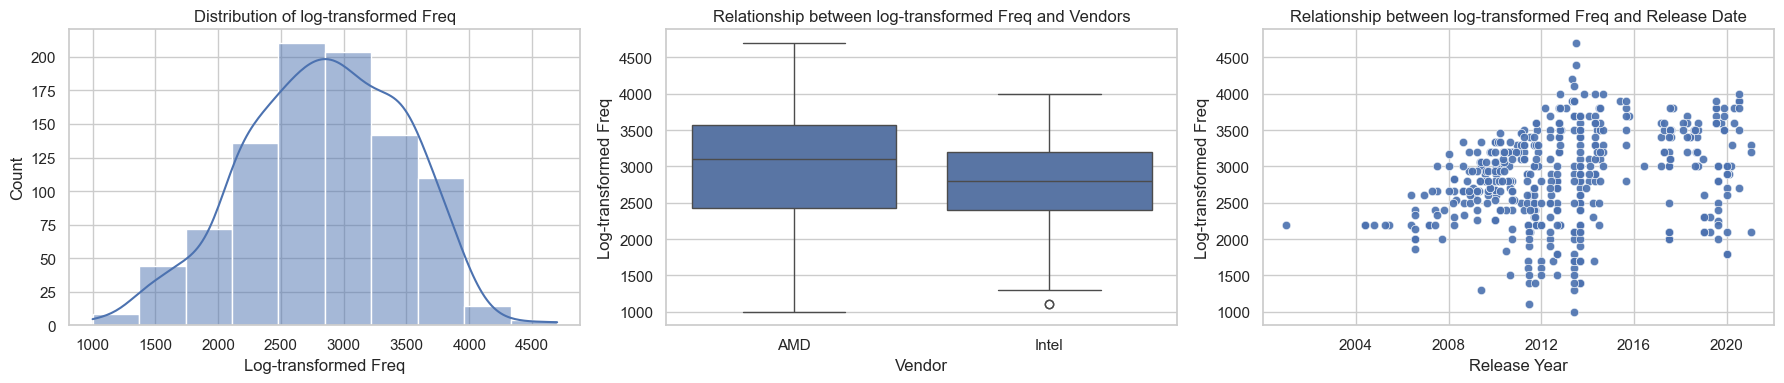

In [10]:
for var in variables:
    log_var = f'log_{var}'
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))  

    # Plot the distribution of the log-transformed variable
    sns.histplot(data=chips, x=log_var, kde=True, bins=10, ax=axs[0])
    axs[0].set_title(f'Distribution of log-transformed {var}')
    axs[0].set_xlabel(f'Log-transformed {var}')
    axs[0].set_ylabel('Count')
    
    # Plot the relationship between the log-transformed variable and vendors
    sns.boxplot(x='Vendor', y=log_var, data=chips, ax=axs[1])
    axs[1].set_title(f'Relationship between log-transformed {var} and Vendors')
    axs[1].set_xlabel('Vendor')
    axs[1].set_ylabel(f'Log-transformed {var}')
    
    # Plot the relationship between the log-transformed variable and release date
    sns.scatterplot(x='Release Date', y=log_var, data=chips, alpha=0.7, ax=axs[2])
    axs[2].set_title(f'Relationship between log-transformed {var} and Release Date')
    axs[2].set_xlabel('Release Year')
    axs[2].set_ylabel(f'Log-transformed {var}')
    
    plt.tight_layout() 
    plt.show()

In [11]:
chips_transformed = chips[['Product', 'Release Date', 'Freq', 'Vendor', 
                            'log_Process Size', 'log_TDP', 'log_Transistors', 'log_Die Size','Score']].copy()

In [12]:
chips_transformed

,Product,Release Date,Freq,Vendor,log_Process Size,log_TDP,log_Transistors,log_Die Size,Score
0,AMD Athlon 64 3500+,2007-02-20,2200,AMD,4.189655,3.828641,4.812184,4.356709,129
1,AMD Athlon 64 3500+,2007-02-20,2200,AMD,4.189655,3.828641,4.812184,4.356709,116
2,AMD Athlon 64 3500+,2001-01-01,2200,AMD,4.510860,4.219508,4.663439,4.753590,129
3,AMD Athlon 64 3500+,2001-01-01,2200,AMD,4.510860,4.219508,4.663439,4.753590,116
4,AMD Athlon 64 3500+,2005-05-31,2200,AMD,4.510860,4.219508,5.043425,5.056246,129
...,...,...,...,...,...,...,...,...,...
939,Intel Core i7-4600M,2013-09-01,2900,Intel,3.135494,3.637586,7.170888,4.779123,1956
940,AMD Ryzen 9 4900H,2020-03-16,3300,AMD,2.079442,4.007333,9.190240,5.056246,1546
941,AMD Ryzen 9 4900H,2020-03-16,3300,AMD,2.079442,4.007333,9.190240,5.056246,6772
942,Intel Core 2 Duo E6550,2007-07-01,2333,Intel,4.189655,4.189655,5.676754,4.969813,260


- Pairplot for transformation variables.

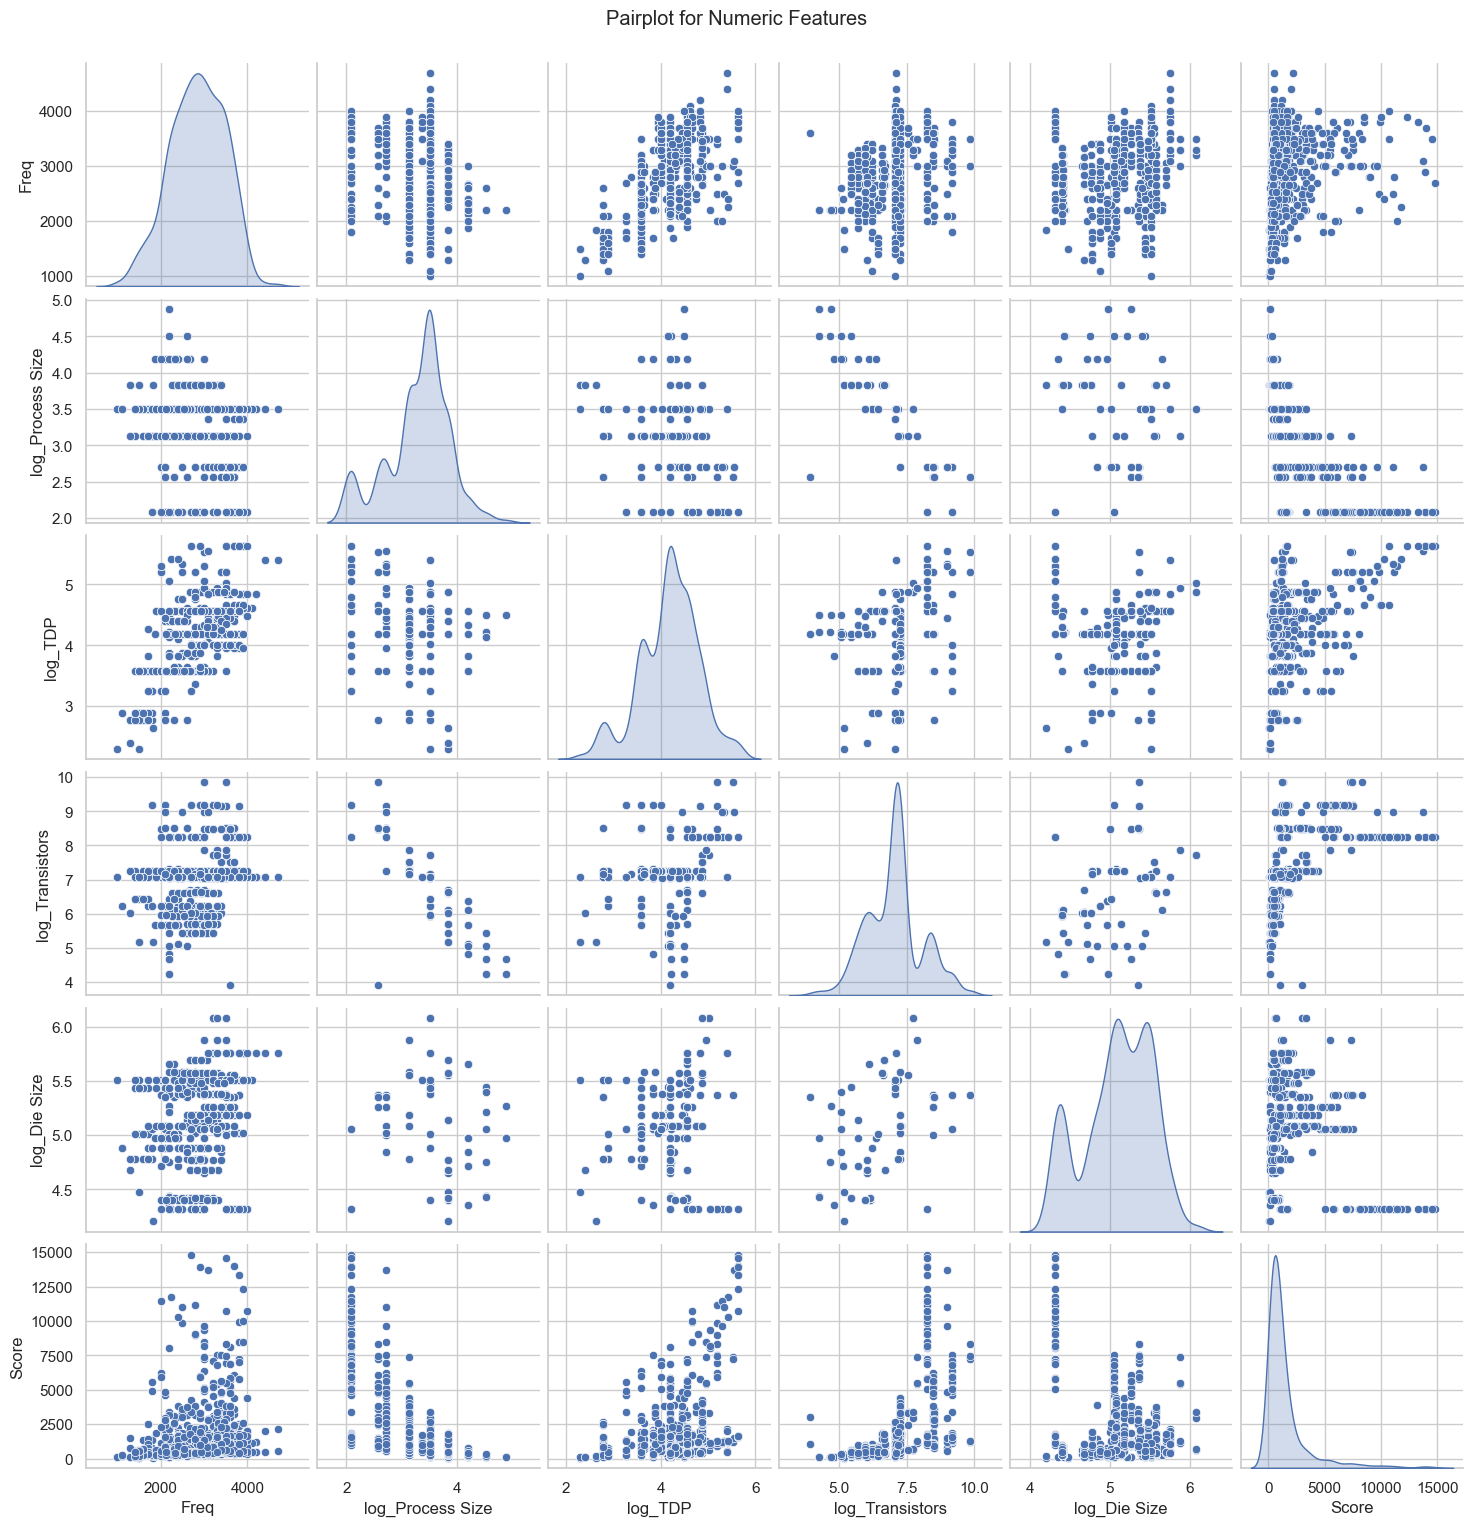

In [13]:
sns.pairplot(chips_transformed,  diag_kind='kde')
plt.suptitle('Pairplot for Numeric Features', y=1.02)
plt.show()

- Heatmap for quantitative variables.

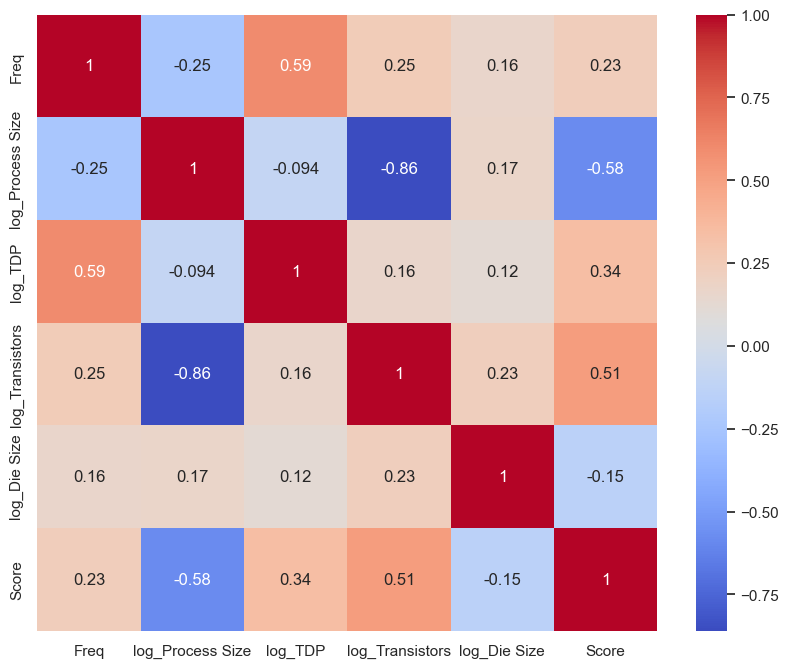

In [14]:
numerical_cols = chips_transformed.select_dtypes(include=['float64', 'int64']).columns

corr = chips_transformed[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.show()

In [15]:
df_cleaned = chips_transformed.dropna()
df_cleaned

,Product,Release Date,Freq,Vendor,log_Process Size,log_TDP,log_Transistors,log_Die Size,Score
0,AMD Athlon 64 3500+,2007-02-20,2200,AMD,4.189655,3.828641,4.812184,4.356709,129
1,AMD Athlon 64 3500+,2007-02-20,2200,AMD,4.189655,3.828641,4.812184,4.356709,116
2,AMD Athlon 64 3500+,2001-01-01,2200,AMD,4.510860,4.219508,4.663439,4.753590,129
3,AMD Athlon 64 3500+,2001-01-01,2200,AMD,4.510860,4.219508,4.663439,4.753590,116
4,AMD Athlon 64 3500+,2005-05-31,2200,AMD,4.510860,4.219508,5.043425,5.056246,129
...,...,...,...,...,...,...,...,...,...
939,Intel Core i7-4600M,2013-09-01,2900,Intel,3.135494,3.637586,7.170888,4.779123,1956
940,AMD Ryzen 9 4900H,2020-03-16,3300,AMD,2.079442,4.007333,9.190240,5.056246,1546
941,AMD Ryzen 9 4900H,2020-03-16,3300,AMD,2.079442,4.007333,9.190240,5.056246,6772
942,Intel Core 2 Duo E6550,2007-07-01,2333,Intel,4.189655,4.189655,5.676754,4.969813,260


# 5. Statistical Output

## 5.1 Appropriate Statistics

## 5.2 Null Hypothesis Tests

## 5.3 Regression Output

In [16]:
x = df_cleaned[['log_Process Size', 'log_TDP', 'log_Transistors', 'log_Die Size', 'Freq']]
y = df_cleaned['Score']

In [17]:
# Detect highly correlated features
def correlation(data,threshold):
# Set of all the names of correlated columns
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
# We care about absolute coef value
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr
corr_features = correlation(x,0.4)
corr_features

{'Freq', 'log_Transistors'}

In [18]:
# x = df_cleaned[['TDP', 'Die Size']]
# y = df_cleaned['Score']

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Creating the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

Coefficients: [-1.81827664e+03  1.23940080e+03  2.30598366e+02 -6.06327460e+02
 -3.81189284e-01]
Intercept: 4914.231159555793
Mean Squared Error (MSE): 2063861.5784603388


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Partition the data set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import statsmodels.api as sm

X_train_scaled_sm = sm.add_constant(X_train_scaled)  # Add constant term

# Create and fit an ordinary least squares linear model
model = sm.OLS(y_train, X_train_scaled_sm).fit()

# View model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     108.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           2.73e-83
Time:                        18:05:43   Log-Likelihood:                -5698.5
No. Observations:                 652   AIC:                         1.141e+04
Df Residuals:                     646   BIC:                         1.144e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1465.5874     59.483     24.639      0.0

__Regression model summary__

Model evaluation metrics

R-squared: 0.457

Adjusted R-squared: 0.453

F-statistic: 108.8

Prob (F-statistic): 2.73e-83

AIC: 1.141e+04

BIC: 1.144e+04

| Variable         | Coefficient | Standard Error | t-value | P-value | 95% Confidence Interval   |
|------------------|-------------|----------------|---------|---------|---------------------------|
| Constant         | 1465.5874   | 59.483         | 24.639  | <0.001  | [1348.785, 1582.390]      |
| Process Size (x1)| -1078.0353  | 172.494        | -6.250  | <0.001  | [-1416.752, -739.319]     |
| TDP (x2)         | 765.9101    | 78.019         | 9.817   | <0.001  | [612.709, 919.111]        |
| Transistors (x3) | 144.4472    | 171.381        | 0.843   | 0.400   | [-192.084, 480.978]       |
| Die Size (x4)    | -235.7868   | 90.778         | -2.597  | 0.010   | [-414.043, -57.531]       |
| Freq (x5)        | -271.0591   | 82.176         | -3.299  | 0.001   | [-432.422, -109.696]      |

The R-squared is 0.457, which means that the regression model can explain about 45.7% of the variance in the dependent variable (score). In other words, the independent variables in the model explain approximately 45.7% of the observed score variation. Although this value is not very high, it also shows that the model has a certain degree of ability to explain the score changes.

# 6. Conclusion

Why is this analysis important?

Limitations of the analysis?